# 분류(Classification) 모델 

- Decision Tree 
- Logistic Regression 
- Navie Bayes 
- Support Vector Machine 
- Nearest Neighbor(최소 근접 알고리즘) 

## [의사 결정 트리 (Decision Tree)](https://scikit-learn.org/stable/modules/tree.html#tree)

- 분류 및 회귀에 사용되는 비모수 감독 학습 방법입니다. 
- 목표는 데이터 기능에서 유추 된 간단한 결정 규칙을 학습하여 대상 변수의 값을 예측하는 모델을 만드는 것입니다.

- 대표적인 분류 학습 모델 
- 이해하고 해석하기 간단합니다. 나무를 시각화 할 수 있습니다.
- 약간의 데이터 전처리가 필요하다. 이 모듈은 결측값을 지원하지 않는다. 
- 숫자 데이터와 범주 데이터를 모두 처리 할 수 있습니다. 

#### 나무를 거꾸로 뒤집은 모양 :: 루트노드 -> 규칙 노드 -> 리프노트


```python 
class sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0
```

### [1] 불순도  (Impurity) 

- 해당 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지를 뜻한다. 
- 불확실성 , 무질서도

### [2] 엔트로피 (Entropy) 

- 불순도를 수치적으로 나타낸 척도, 엔트로피가 높다는 것은 불순도가 높다. 

### [3] 정보 이득 (Information gain) : 1 - Entropy

- 결정트리는 구분 뒤 각 영역의 순도가 증가, 불순도는 감소하는 방향으로 학습을 진행
- 정보이론에 의한 정보 이득 

### [4] 지니계수 (Gini Coefficent):  1 - (각 범주별 데이터의 비율의 제곱의 합 ) 
- 순도가 높아지면 지니계수는 0이 된다. 1이면 최대 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 한글 출력을 위한 설정
import matplotlib
matplotlib.rcParams['font.family']="NanumBarunGothic"
matplotlib.rcParams['axes.unicode_minus'] = False

# Decision Tree 모듈 
from sklearn.tree import DecisionTreeClassifier
# 데이터 train/test 나누기 
from sklearn.model_selection import train_test_split

## Classification
- 다중 클래스 분류를 수행할 수 있다. 

In [2]:
from sklearn import tree 

X = [[0,0], [1, 1]]
Y = [0, 1]

# 훈련 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

# 예측 
clf.predict([[2., 2.]])

# 리프 노드 에서 동일한 클래스 트레이닝 샘플의 비율 
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

### iris dataset으로 트리를 구성 

In [3]:
from sklearn.datasets import load_iris
from sklearn import tree 

X, y = load_iris(return_X_y = True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 한번의 훈련, plot_tree( ) 함수를 사용해 트리플로팅 

In [4]:
# Iris Data set 가져오기 
from sklearn.datasets import load_iris

iris = load_iris()

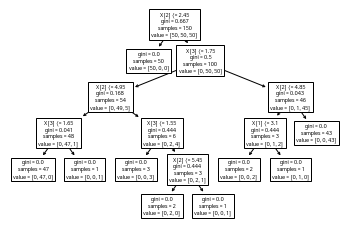

In [5]:
tree.plot_tree(clf.fit(iris.data, iris.target))
plt.show()

### graphviz 이용해 pdf 출력 

In [6]:
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

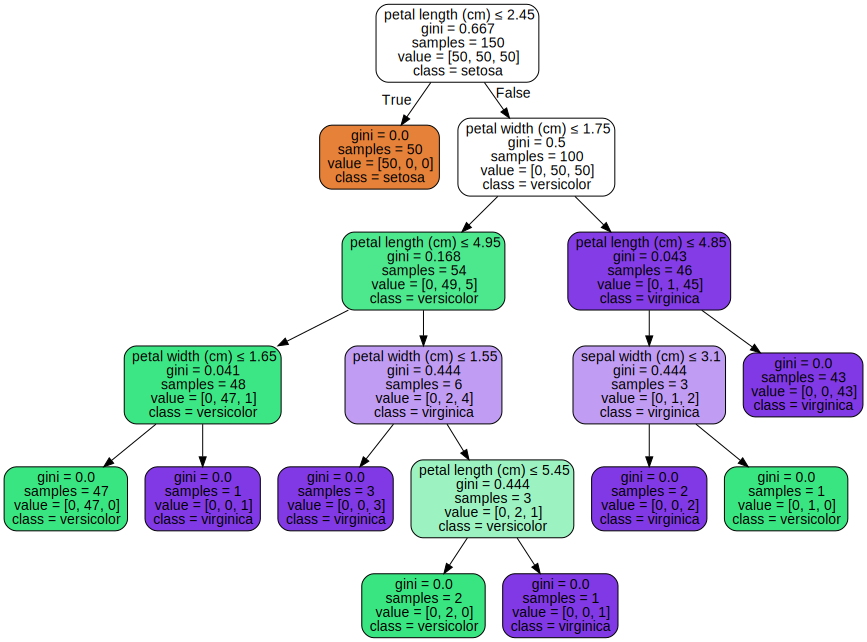

In [7]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 

## Iris 품종 예측하기 

In [8]:
# Iris Data set 가져오기 
from sklearn.datasets import load_iris

iris = load_iris()
type(iris)  # Bunch 타입 


# x 피쳐(Feature)만 가져오기 
iris_data = iris.data
iris_data

# y 값(Labeel) 만 추출 
iris_label = iris.target
iris_label

# y label 이름 추출 
print(iris.feature_names)

# x label 이름 추출 
print(iris.target_names)

# ['setosa' 'versicolor' 'virginica'] - 품종 
# ['sepal length (cm)'  - 꽃받침 
# 'sepal width (cm)',   
# 'petal length (cm)',  - 꽃잎
# 'petal width (cm)']

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris_label
iris_df

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### test data set/ train data set 분리 

In [9]:
# Create a random dataset  : train 80%,  test 20%  
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, 
                                                    random_state=11) # 20%  random seed 고정, 동일한 데이터 추출 

X_train.shape, X_test.shape, y_train.shape, y_test.shape
# ((120, 4), (30, 4), (120,), (30,))

((120, 4), (30, 4), (120,), (30,))

### 학습

In [10]:
# Fit regression model
dt_clf = DecisionTreeClassifier(random_state=11) # seed 고정, 동일한 학습 

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

### 예측

In [11]:
# Predict 
pred = dt_clf.predict(X_test)
pred, y_test

(array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
        0, 1, 0, 0, 2, 1, 0, 1]),
 array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
        0, 1, 0, 0, 2, 1, 0, 1]))

### 정확도 

In [12]:
# accuracy 
from sklearn.metrics import accuracy_score, classification_report

print('정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))  # 0.933


cl_report = classification_report(y_test, pred)
print('리포트: \n', cl_report)

정확도:  0.9333
리포트: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



## 결정 트리 모델의 시각화 : 학습과정

In [13]:
# Create a random dataset  : train 80%,  test 20%  
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, 
                                                    random_state=11) # 20%  random seed 고정, 동일한 데이터 추출 

X_train.shape, X_test.shape, y_train.shape, y_test.shape
# ((120, 4), (30, 4), (120,), (30,))

dt_clf = DecisionTreeClassifier(random_state=11) # seed 고정, 동일한 학습 
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

In [24]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot', class_names= iris.target_names,
               feature_names=iris.feature_names,impurity=True, filled=True)

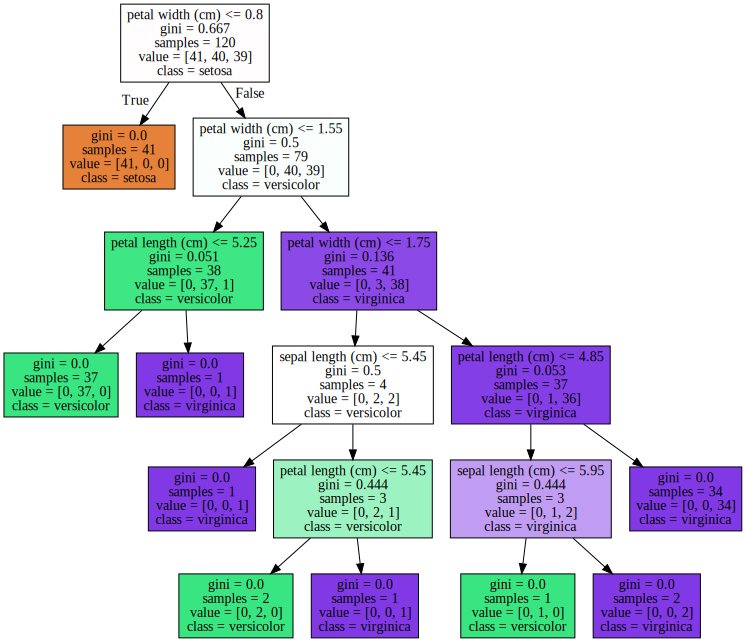

In [25]:
import graphviz

f = open('tree.dot')
dot_graph = f.read()
graphviz.Source(dot_graph)

In [15]:
# 지니계수 : 0.667 

# gini = 0.667
# samples = 120
# value = [41, 40, 30]
# calss = setosa 

gini = 1-((41/120)**2 + (40/120)**2 + (39/120)**2)
print(gini)


# petal length (cm) ≤ 4.95
# gini = 0.168
# samples = 54
# value = [0, 49, 5]
# class = versicolor

gini = 1-((0/54)**2 + (49/54)**2 + (5/54)**2)
print(gini)

0.6665277777777778
0.16803840877914955


### Feature importance  : 결정 트리의 규칙노드가 분기 조건으로 사용할 피쳐의 우선 순위에 사용  


In [16]:
import seaborn as sns

Feature Importance:
[0.025 0.    0.049 0.926]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.049
petal width (cm) : 0.926


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
label,0.782561,-0.426658,0.949035,0.956547,1.000000


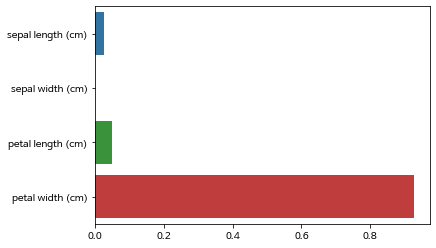

In [17]:
print('Feature Importance:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
sns.barplot(x = dt_clf.feature_importances_, y=iris.feature_names)
iris_df.corr()   # 상관 관계

### 내부 알고리즘 처리 과정 분석 

#### GINI 계수 함수 구현 

In [18]:
### GINI 계수 함수 구현 

def gini(value):
    array_of_values = np.array(value)
    array_of_sum = array_of_values.sum()
    squared_sum = 0 
    
    for value in array_of_values:
        squared_sum += (value/array_of_sum)**2
    return round(1- squared_sum, 3)

gini([41, 40, 39])

0.667

### 1번 노드 : 

```python 
petal width (cm) <= 0.8
gini = 0.667
samples = 120
value = [41, 40, 39]
class = setosa
```

In [19]:
# 1번 노드 : 루트 노드, 규칙 노드 (자식을 가지고 있음) 
# root node 실행 구조

first_df = pd.DataFrame(data=X_train, columns=iris.feature_names)
first_df['label'] = y_train

first_df

print(first_df['label'].value_counts())   
print(gini([41, 40, 39]))      # gini = 0.667 , 지니 계수가 크므로 자식노드(2, 3번)로 분리 된다.


# 자식노드 생성 
second_node = first_df[first_df['petal width (cm)'] <=0.8]   # => 자식 노드 (2번 노드) 생성
third_node =  first_df[first_df['petal width (cm)'] > 0.8]   # => 자식 노드 (2번 노드) 생성

0    41
1    40
2    39
Name: label, dtype: int64
0.667


### 2번 노드 :  쳣번째 터미널 노드, 리프 노드 

```python 
gini = 0.0
samples = 41
value = [41, 0, 0]
class = setosa
```

In [27]:
second_node['label'].value_counts()
print('gini: ', gini([41,0,0]))
print('class: ', iris.target_names[0])

gini:  0.0
class:  setosa


### 3번 노드 : 쳣번째 터미널 노드, 리프 노드

```python 
petal width (cm) <= 1.55
gini = 0.5
samples = 79
value = [0, 40, 39]
class = versicolor
```


In [29]:
print(third_node['label'].value_counts())
print('gini:', gini([0, 40, 40]))
      
# 자식노드 생성 
fourth_node = third_node[third_node['petal width (cm)'] <= 1.55]   # => 자식 노드 (4번 노드) 생성
fifth_node =  third_node[third_node['petal width (cm)'] > 1.55]   # => 자식 노드 (5번 노드) 생성

1    40
2    39
Name: label, dtype: int64
gini: 0.5
